# Wstęp do uczenia maszynowego
##  Praca domowa nr 2
#### Jakub Piwko, Malwina Wojewoda
***
***
***

### Pakiety

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
from sklearn.model_selection import train_test_split

### Wczytanie i analiza danych

Zbiór danych opisuje transakcje zarejestrowane na stronie allegro.pl w ciągu jednego pełnego dnia 3 kwietnia 2016r. 
Zmienna, którą przewidujemy: cena

In [114]:
df = pd.read_csv('allegro-api-transactions.csv')
df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


#### Analiza braków danych

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

W ramce danych nie wystąpują wartości None/Null, więc nie będziemy musieli zajmować się uzupełnianiem brakujących wartości.

#### Rozkłady zmiennych
Pomimo, że niektóre zmienne są typu *int* i *float*, to mogą to być zmienne dyskretne/kategoryczne. Sprawdźmy to zatem:

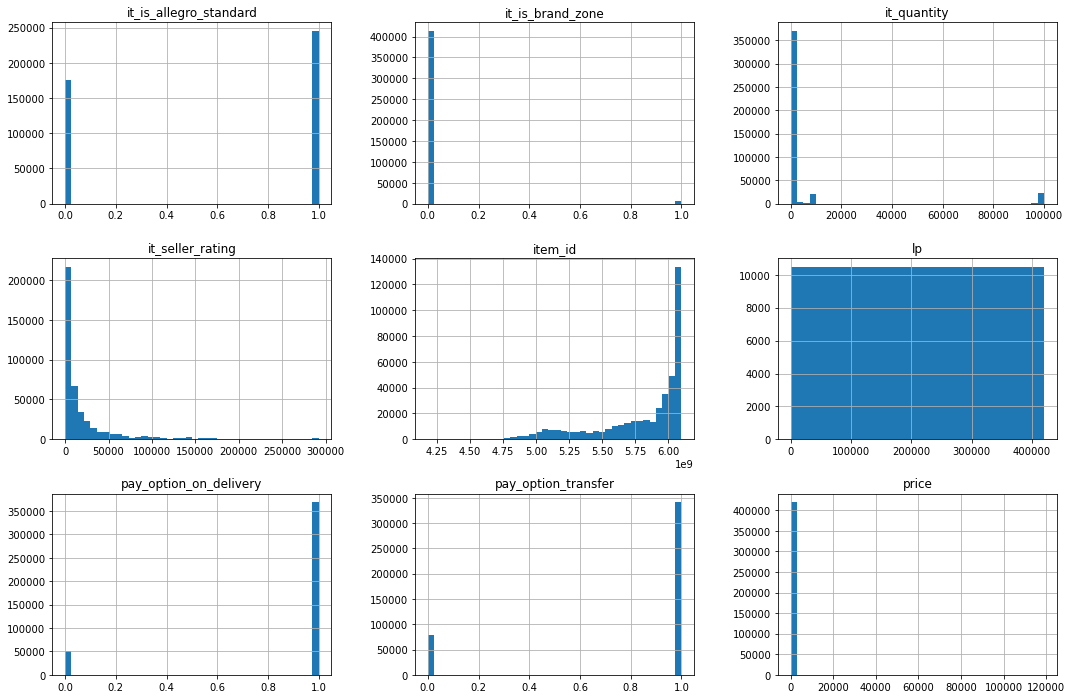

In [5]:
df.hist(figsize=(18, 12), bins=40)
plt.show()

Mimo, że z histogramu niektóre wielkości wyglądają na kategoryczne lepiej upewnic się korzystając ze zliczenia występujących wartości:

In [18]:
df['pay_option_on_delivery'].value_counts()

1    368766
0     51254
Name: pay_option_on_delivery, dtype: int64

In [19]:
df['pay_option_transfer'].value_counts()

1    341264
0     78756
Name: pay_option_transfer, dtype: int64

In [20]:
df['it_is_allegro_standard'].value_counts()

1    245063
0    174957
Name: it_is_allegro_standard, dtype: int64

In [21]:
df['it_is_brand_zone'].value_counts()

0    413008
1      7012
Name: it_is_brand_zone, dtype: int64

In [22]:
df['it_quantity'].value_counts()

0        63480
1        11349
2         8579
3         7234
4         6865
         ...  
19969        1
7997         1
3314         1
8106         1
65505        1
Name: it_quantity, Length: 7305, dtype: int64

In [23]:
df['price'].value_counts()

1.00      7904
9.99      4441
19.99     4201
99.00     3583
15.00     3393
          ... 
58.66        1
443.00       1
169.87       1
209.49       1
116.62       1
Name: price, Length: 9722, dtype: int64

Widać więc, że zmienne *pay_option_on_delivery*, *pay_option_transfer*, *it_is_allegro_standard*, *it_is_brand_zone* są kategoryczne z dwiema wartościami: 0 i 1. Natomiast zmienne *it_quantity* oraz *price* okazały się być ciągłe.

In [25]:
# NIE WIEM  W SUMIE CO Z TYMI CO MAJA TYP OBJECT

### Podział na zbiór treningowy, testowy i walidacyjny

In [148]:
#Wyróżnienie zbioru, na którym będziemy pracować i zbiory do walidacji
X, X_valid = sklearn.model_selection.train_test_split(
    df,
    test_size=0.30, random_state=100)

#Wyróżnienie zbioru treningowego i testowego
X_train, X_test = sklearn.model_selection.train_test_split(
    X,
    test_size=0.30, random_state=100)

### Zamiana zmiennych ciągłych na kategoryczne

Nie ma sensu zmienać zmiennej *item_id* ponieważ to numer identyfikujący konketną rzecz. Do zmiany pozostają zatem tylko zmienne *it_quantity*,  *it_seller_rating* oraz *price*.

##### it_guantity

Text(0.5, 1.0, 'Zmienna it_quantity')

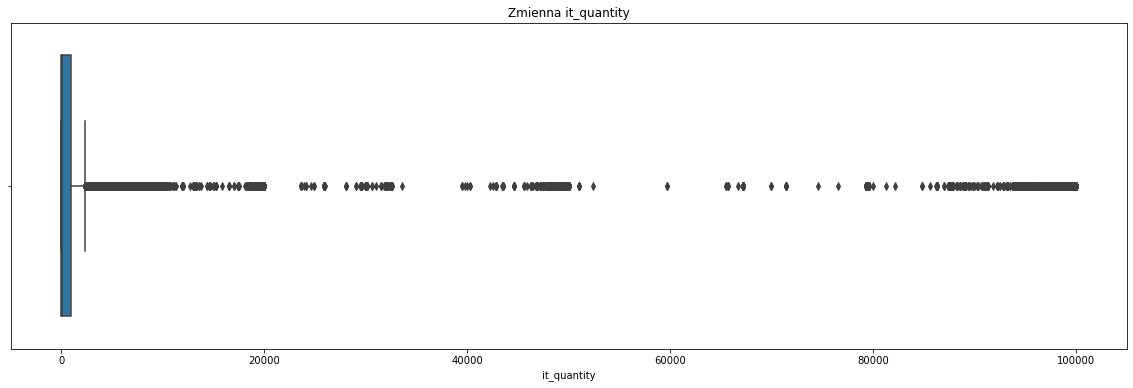

In [90]:
plt.figure(figsize=(20, 6))
box_plot = sns.boxplot(X_train['it_quantity'])
box_plot.set_title('Zmienna it_quantity')

In [91]:
X_train['it_quantity'].max()

99999

In [92]:
# NIE WIEM JAK TU PODZIELIC

# Może tak? Zostawiam obie wersje

Jako, że zmienna `it_quantity` mówi nam o tym, ile egzemplarzy danego produktu ktoś kupił, możemy podzielić go na następujące kategorie:

* 1: 1 egzemplarz
* 2: od 2 do 10 egzeplarzy
* 3: od 11 do 1000 egzemplarzy
* 4: od 1001 do 10000 egzemplarzy
* 5 od 10000 egzemplarzy

Gdzie pierwsze dwie opcje odpowiadają bardziej zakupom detalicznym, a dwie ostatnie hurtowym. W wyniku otrzymamy dosyć równomierny podział.

In [93]:
X_train['it_quantity'] = pd.cut(X_train['it_quantity'], bins=[-1, 1, 10, 100, 1000, 100000], labels=[1, 2, 3, 4, 5])

In [77]:
X_train['it_quantity'].value_counts()

4    71868
3    46182
1    36748
5    26979
2    24032
Name: it_quantity, dtype: int64

Podzielimy tę zmienną na 5 grup: 
* A: 0-19 999
* B: 20 000 - 39 999
* C: 40 000 - 59 999
* D: 60 000 - 79 999
* E: 80 000 - 100 000

In [29]:
X_train['it_quantity'] = pd.cut(X_train['it_quantity'], bins=[-1, 20000, 40000, 60000, 80000, 100000], labels=['A', 'B', 'C', 'D', 'E'])

In [24]:
X_train['it_quantity'].value_counts()

3    118050
1     36748
4     26979
2     24032
Name: it_quantity, dtype: int64

##### it_seller_rating

Text(0.5, 1.0, 'Zmienna it_seller_rating')

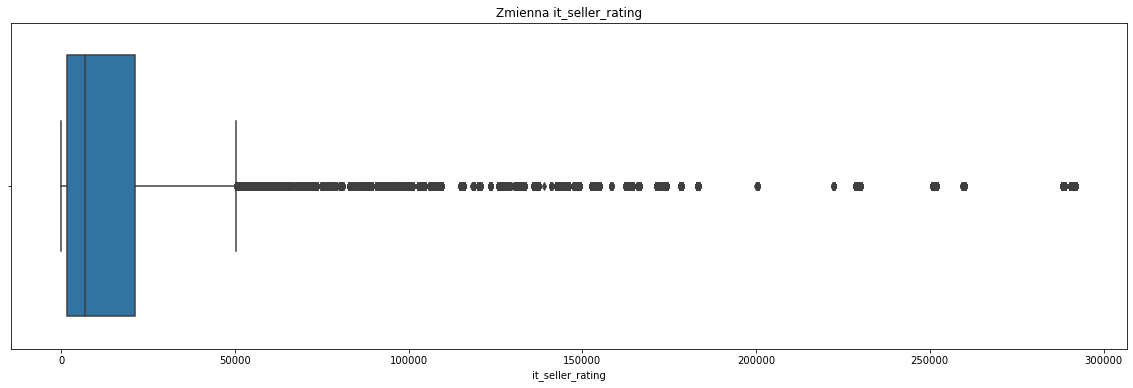

In [44]:
plt.figure(figsize=(20, 6))
box_plot = sns.boxplot(X_train['it_seller_rating'])
box_plot.set_title('Zmienna it_seller_rating')

In [217]:
X_train["it_seller_rating"].describe()

count    205809.000000
mean      20485.224801
std       36916.108466
min          -1.000000
25%        1577.000000
50%        6709.000000
75%       21051.000000
max      292074.000000
Name: it_seller_rating, dtype: float64

In [197]:
X_train[X_train.seller == "ezebra_pl"][['seller', 'it_seller_rating']]

,seller,it_seller_rating
387776,ezebra_pl,95755
319097,ezebra_pl,95775
198298,ezebra_pl,95782
335130,ezebra_pl,95271
91461,ezebra_pl,94531
...,...,...
64397,ezebra_pl,95458
349837,ezebra_pl,95766
387729,ezebra_pl,95743
130334,ezebra_pl,95769


Jako, że zmienna `it_seller_rating` mówi nam o ocenie sprzedającego. Jak widać na powyższej tabeli, dla jednego konretnego sprzedającego, rating nie zmienia się w ciągu dnia. Klienci oceniają sprzedawcę między transakcjami, ale ocena nie zmienia się drastycznie. Można na początek zamienić ocenę dla każdego unikalnego sklepu średnią ratingów z dnia, aby później kategoryzacja była jednoznaczna.

In [218]:
#A może jednak nie zmieniać bo to trwa wieczność z taką ilością wartości :((
# sellers = X_train1.seller.unique()[1:1000]
# for sel in sellers:
#     X_train1[X_train1.seller == sel]['it_seller_rating'] = X_train1[X_train1.seller == sel]['it_seller_rating'].mean()

Możemy teraz dokonać kategoryzacji zmienniej `it_seller_rating` na następujące grupy:

* 0 - 1000 - 1
* 10001 - 3000 - 2
* 3000 - 10000 - 3
* 10000 - 50000 - 4
* 50000 - 300000 - 5

In [219]:
X_train['it_seller_rating'] = pd.cut(X_train['it_seller_rating'], bins=[-1, 1001, 3001, 10001, 50001, 300000], labels=[1,2,3,4,5])

In [222]:
X_train['it_seller_rating'].value_counts()

4    61097
3    49970
1    40191
2    30868
5    23679
Name: it_seller_rating, dtype: int64

## W sumie to ja tak podzieliłem nierównomiernie, ale można najpierw przetransfromować te zmienne jakimś logarytmem a potem dzielić, efekt będzie raczej ten sam.

##### price

Text(0.5, 1.0, 'Zmienna price')

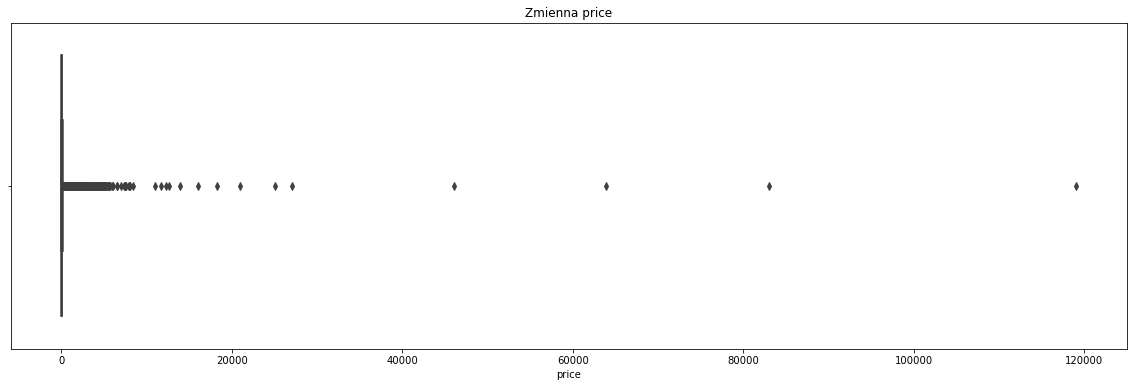

In [61]:
plt.figure(figsize=(20, 6))
box_plot = sns.boxplot(X_train['price'])
box_plot.set_title('Zmienna price')

Jeśli mamy podzielić zmienną *price* na 3 kategorie: cena wysoka, cena średnia oraz cena niska, to widać, że dane większe niż 10000 będą z pewnością zaliczać się do ostaniej grupy, ponieważ są to wartości odstające. 

In [78]:
X_train['price'].describe()

count    205809.000000
mean         76.939211
std         432.166615
min           0.000000
25%           9.000000
50%          24.990000
75%          68.000000
max      119000.000000
Name: price, dtype: float64

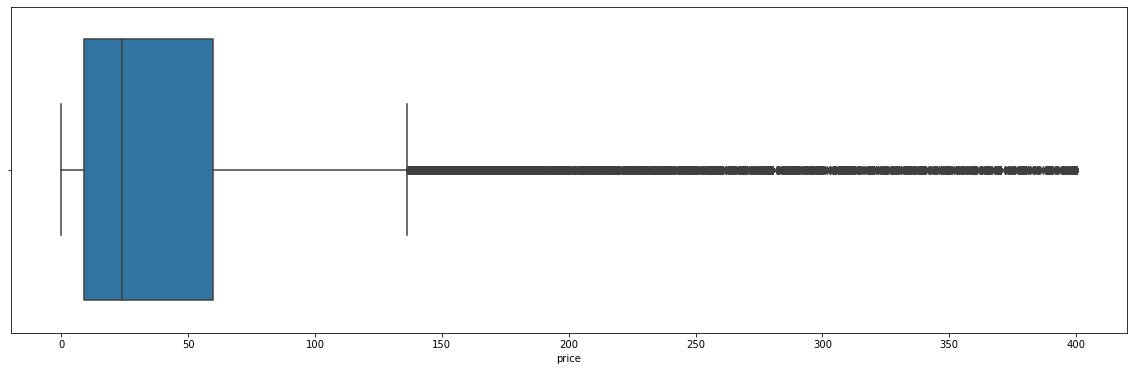

In [79]:
plt.figure(figsize=(20, 6))
tmp = X_train.loc[X_train['price'] < 400]
box_plot = sns.boxplot(tmp['price'])

In [80]:
np.percentile(X_train['price'], 90)

168.72000000000116

In [81]:
#NIE WIEM TU W SUMIE JAK DOKŁADNIE PODZIELIĆ

In [94]:
tmp = pd.cut(X_train['price'], bins=[0, 150, 1000, np.inf], labels=['niska cena', 'średnia cena', 'wysoka cena'])

In [50]:
# sprawdzamy czy przy takim podziale wstąpią jakieś braki dnaych
tmp[tmp.isna()]

206090    NaN
247789    NaN
127751    NaN
58547     NaN
8433      NaN
336570    NaN
224534    NaN
328635    NaN
182919    NaN
45669     NaN
201684    NaN
346869    NaN
12741     NaN
320207    NaN
417758    NaN
379219    NaN
Name: price, dtype: category
Categories (3, object): ['niska cena' < 'średnia cena' < 'wysoka cena']

In [82]:
#sprawdzamy dlaczego wystapiły
X_train.loc[379219, 'price']

0.0

Nie wiadomo jak interpretować cenę wynoszącą 0, zatem ze względu na to, że wartości tych jest stosunkowo niewiele lepiej je usunąć.

In [95]:
X_train = X_train[X_train.price != 0]

In [96]:
#zmiana pice na zmienną kategoryczną:
X_train['price'] = pd.cut(X_train['price'], bins=[0, 150, 1000, np.inf], labels=['niska cena', 'średnia cena', 'wysoka cena'])

#### Kodowanie zmiennych kategorycznych

Jak wynika już z wcześniejszej analizy, zmienne `pay_option_on_delievery`, `pay_option_delievry`, `it_is_allegro_standar`, `it_is_brand_zone` są kategoryczne. Można uznać nawet, że są już zmiennymi w kodowaniu "one-hot". Przyjrzyjmy się innym zmiennym.

Na pierwszy rzut oka wydaje się, że zmienne `categories` i `main_category` niosą podobną informację. 

In [112]:
X_train['main_category'].value_counts()

Dom i Ogród                44690
Odzież, Obuwie, Dodatki    26750
Motoryzacja                22371
Dla Dzieci                 20506
Uroda                      13775
Sport i Turystyka          13498
RTV i AGD                   9927
Telefony i Akcesoria        9729
new value                   7828
Zdrowie                     6489
Książki i Komiksy           5709
Delikatesy                  3902
Gry                         3527
Rękodzieło                  3246
Kolekcje                    3009
Przemysł                    2909
Biżuteria i Zegarki         2830
Biuro i Reklama             1575
Fotografia                  1165
Muzyka                       941
Antyki i Sztuka              563
Filmy                        519
Instrumenty                  292
Bilety                        58
Nieruchomości                  1
Name: main_category, dtype: int64

In [111]:
X_train.loc[X_train.main_category == "Motoryzacja"]['categories'].value_counts()

['Motoryzacja', 'Opony', 'Opony samochodowe', 'Letnie']                                                                                              1224
['Motoryzacja', 'Części samochodowe', 'Oświetlenie', 'Żarówki']                                                                                       561
['Motoryzacja', 'Akcesoria samochodowe', 'Dywaniki', 'Dywaniki gumowe']                                                                               249
['Motoryzacja', 'Akcesoria samochodowe', 'Dywaniki', 'Dywaniki welurowe']                                                                             248
['Motoryzacja', 'Chemia', 'Oleje silnikowe', 'Syntetyczne']                                                                                           202
                                                                                                                                                     ... 
['Motoryzacja', 'Samochody', 'Osobowe', 'Opel', 'Zafira', 'B (2005-2011)']  

Okazuje się, że zmienna `categories` jest rozszerzeniem zmiennej `main_catogery`. Wydaje się, więc że ze względu na duże rozdrobnienie lepiej będzie usunąć zmienną `categories` i pozostawić bardziej ogólną zmienną. 

In [97]:
X_train.drop('categories', axis = 1, inplace = True)

Dodatkowo, można popracować nad redukcją różnych kategorii w zmiennej `main_category`. Wydaje się, że niektóre kategorie dotyczą podobnych produktów, dzięki czemu możliwe jest ich scalenie. 
Na początek do grupy 'RTV i AGD' dodamy też grupy 'telefony i akcesoria', 'Komputery', 'Konsole i automaty' i 'Sprzęt estradowy, studyjny i DJ-ski'.
Kategorie 'Książki i komiksy', 'Gry', 'Rękodzieło', 'Kolekcje', 'Fotografia', 'Muzyka', 'Antyki i Sztuka', 'Filmy', 'Instrumenty' połączymy w jedną kategorię 'Rozrywka i sztuka'.
Kategorię 'Biżuteria i `zegarki' dołączymy do kategorii 'Odzież, obuwie, dodatki'.
Kategorię 'Uroda' i 'Zdrowie' połączymy w kategorię 'Uroda i zdrowie'
Kategorie 'Delikatesy', 'Przemysł', 'Biuro i Reklama', 'Bilety' i 'Nieruchomości' połączymy w grupę "Przemysł i usługi"impo

In [120]:
rtv = ['Komputery', 'Telefony i Akcesoria', 'Konsole i automaty', 'Sprzęt estradowy, studyjny i DJ-ski']
art = ['Książki i Komiksy', 'Gry', 'Rękodzieło', 'Kolekcje', 'Fotografia', 'Muzyka', 'Antyki i Sztuka', 'Filmy', 'Instrumenty']
ind = ['Delikatesy', 'Przemysł', 'Biuro i Reklama', 'Bilety', 'Nieruchomości']

X_train['main_category'] = X_train['main_category'].replace(rtv, 'RTV i AGD')
X_train['main_category'] = X_train['main_category'].replace(art,'Sztuka i Rozrywka')
X_train['main_category'] = X_train['main_category'].replace('Biżuteria i Zegarki','Odzież, Obuwie, Dodatki')
X_train['main_category'] = X_train['main_category'].replace(['Uroda', "Zdrowie"],'Uroda i Zdrowie')
X_train['main_category'] = X_train['main_category'].replace(ind,'Przemysł i usługi')

In [121]:
X_train['main_category'].value_counts()

Dom i Ogród                44690
Odzież, Obuwie, Dodatki    29580
RTV i AGD                  27484
Motoryzacja                22371
Dla Dzieci                 20506
Uroda i Zdrowie            20264
Sztuka i Rozrywka          18971
Sport i Turystyka          13498
Przemysł i usługi           8445
Name: main_category, dtype: int64

Dane w naszej ramce pochodzą z jednego konretnego dnia, 3 kwietnia 2016 roku. Dlatego wydaje się, że można ze zmiennej `date` wyciągnąć informacje o godzinie i umieścić w zmiennej 'time' informującej o godzinie dokonania zakupu. Następnie można pogrupować uczynić zmienną 'type' kategoryczną dzieląc na 4 grupy:

* 0:00 - 6:00 - 1 jako 'noc'
* 6:00 - 12:00 - 2  jako 'ranek'
* 12:00 - 18:00 - 3 jako 'popołudnie'
* 18:00 - 24:00 - 4 jako 'wieczór'

Dodatkowo można pozbyć się kolumny 'date'.

In [165]:
X_train['date'] = pd.to_datetime(X_train['date'])
X_train['time'] = X_train['date'].apply(lambda x:x.time())
X_train['time'] = X_train['time'].apply(lambda x:x.hour)
X_train['time'] = pd.cut(X_train['time'], bins=[-1, 5, 11, 17, 24], labels=[1, 2, 3, 4])
X_train.drop('date', axis = 1, inplace = True)

Pozostały jeszcze kolumny `seller` i `it_location`.

In [172]:
X_train['seller'].value_counts()

Allegro          798
darmarsklep      714
ezebra_pl        561
sklepogrodnik    536
leobert          501
                ... 
sylwester-1        1
mirat_eu           1
napitu             1
mstyleallegro      1
czarny_r1          1
Name: seller, Length: 37467, dtype: int64

In [174]:
X_train['it_location'].value_counts()

Warszawa                    11227
Kraków                       7514
Łódź                         5358
Poznań                       5174
Wrocław                      4245
                            ...  
WARSZAWA - WAWER                1
Majków                          1
Czerwionka - Leszczyny          1
Stróżewo Chodzież Poznań        1
Krokowa                         1
Name: it_location, Length: 7970, dtype: int64

In [187]:
tmp = X_train.groupby(['it_location']).size().reset_index(name='counts').sort_values(by = 'counts', ascending=False)

In [190]:
tmp[tmp.counts > 1000]

,it_location,counts
5900,Warszawa,11227
2528,Kraków,7514
7674,Łódź,5358
4206,Poznań,5174
6241,Wrocław,4245
367,Białystok,3584
2917,Lublin,3225
4714,Rzeszów,2936
2300,Kielce,2827
995,Częstochowa,2763


Nie mam bladego pojęcia co zrobić z tymi location i seller. Czy upakować jakieś kategorie które nie przekraczają progu do others czy jakoś wybierać? ale to jest tyle róznych wartości. A jeszcze te nazwy miast są takie jak widać - dramat. :(